In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

df = pd.read_csv("./../data/booking.csv")
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [7]:
X = df.loc[:, df.columns!= 'booking_status']
y = df.loc[:, 'booking_status']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)


In [15]:
gbclf = GradientBoostingClassifier(random_state=10)
gbclf.fit(X_train, y_train)
y_pred = gbclf.predict(X_test)

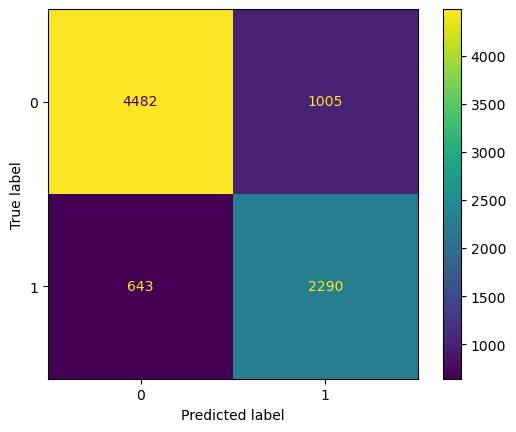

In [20]:
cm = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(cm).plot()

In [23]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      5487
           1       0.69      0.78      0.74      2933

    accuracy                           0.80      8420
   macro avg       0.78      0.80      0.79      8420
weighted avg       0.81      0.80      0.81      8420



In [25]:
df1 = pd.DataFrame()
df1['feature_importances_'] = gbclf.feature_importances_
df1['feature_names_in_'] = gbclf.feature_names_in_ 

In [32]:
df1 = df1.sort_values('feature_importances_', ascending=False)

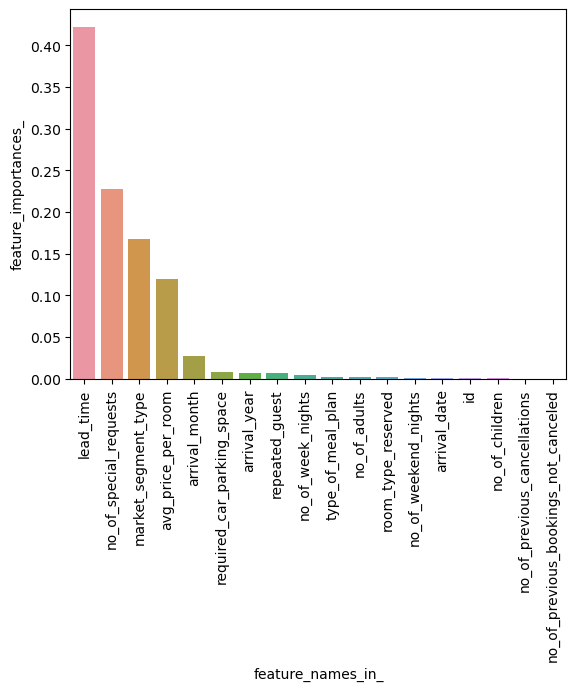

In [46]:
ax = sns.barplot(x='feature_names_in_', y='feature_importances_', data =df1)
plt.xticks(rotation=90)
plt.show()

# Q2. Shrinkage Boosting

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)


In [54]:
gbc = GradientBoostingClassifier(random_state=10)

In [65]:
params = {'learning_rate':[0.1, 0.05, 0.01, 0.005, 0.001]}

kfold = KFold(n_splits=5, random_state=10, shuffle=True)
gscv = GridSearchCV(gbc, param_grid=params, verbose=6, cv=kfold,  return_train_score=True , scoring='accuracy')

In [66]:
cv_results = gscv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END learning_rate=0.1;, score=(train=0.810, test=0.816) total time=  10.4s
[CV 2/5] END learning_rate=0.1;, score=(train=0.813, test=0.811) total time=  10.5s
[CV 3/5] END learning_rate=0.1;, score=(train=0.813, test=0.810) total time=  10.3s
[CV 4/5] END learning_rate=0.1;, score=(train=0.814, test=0.806) total time=  10.1s
[CV 5/5] END learning_rate=0.1;, score=(train=0.816, test=0.802) total time=  10.1s
[CV 1/5] END learning_rate=0.05;, score=(train=0.804, test=0.811) total time=  10.1s
[CV 2/5] END learning_rate=0.05;, score=(train=0.806, test=0.806) total time=  10.1s
[CV 3/5] END learning_rate=0.05;, score=(train=0.806, test=0.803) total time=  10.1s
[CV 4/5] END learning_rate=0.05;, score=(train=0.806, test=0.802) total time=  10.2s
[CV 5/5] END learning_rate=0.05;, score=(train=0.807, test=0.799) total time=  10.1s
[CV 1/5] END learning_rate=0.01;, score=(train=0.770, test=0.772) total time=  10.2s
[CV 2/5] E

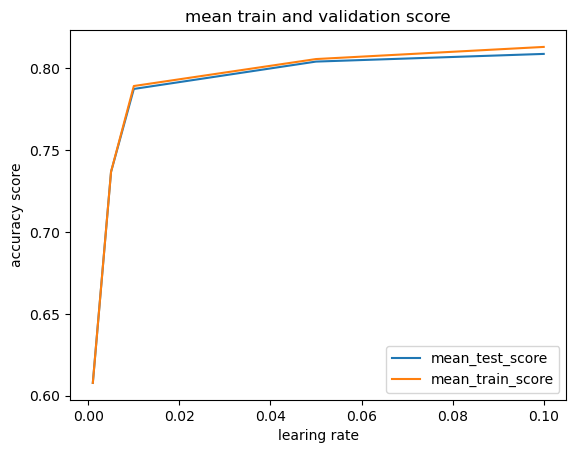

In [78]:
sns.lineplot(y=cv_results.cv_results_['mean_test_score'], x = [0.1, 0.05, 0.01, 0.005, 0.001],  label = 'mean_test_score')
sns.lineplot(y = cv_results.cv_results_['mean_train_score'], x = [0.1, 0.05, 0.01, 0.005, 0.001], label = 'mean_train_score')
plt.legend()
plt.title('mean train and validation score')
plt.xlabel('learing rate')
plt.ylabel('accuracy score')
plt.show()


# Q3. Boosting Max Depth


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
gbc = GradientBoostingClassifier(random_state=10)
params = {'max_depth':range(1, 16)}
kfold = KFold(n_splits=3, random_state=10, shuffle=True)
gscv = GridSearchCV(gbc, param_grid=params, verbose=6, cv=kfold,  return_train_score=True , scoring='accuracy', n_jobs=-1)
cv_results = gscv.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


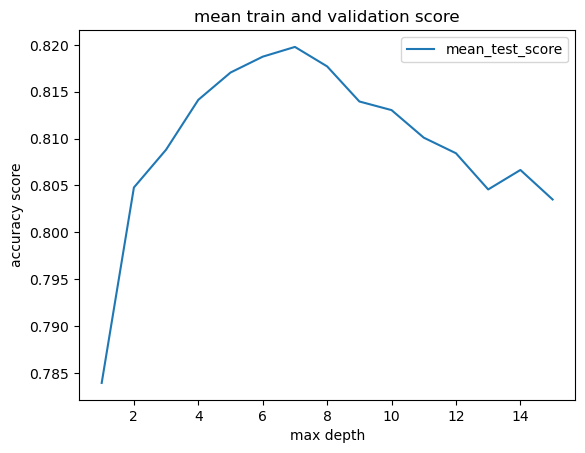

In [87]:
sns.lineplot(y=cv_results.cv_results_['mean_test_score'], x = range(1, 16),  label = 'mean_test_score', markers='o')
#sns.lineplot(y = cv_results.cv_results_['mean_train_score'], x = range(1, 16), label = 'mean_train_score')
plt.legend()
plt.title('mean train and validation score')
plt.xlabel('max depth')
plt.ylabel('accuracy score')
plt.show()


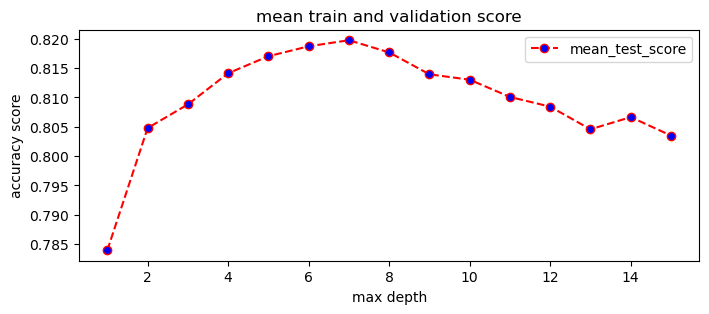

In [95]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 16), cv_results.cv_results_['mean_test_score'], color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', label= 'mean_test_score')
#plt.plot(range(1, 16), cv_results.cv_results_['mean_train_score'], color='blue', linestyle='dashed', marker='o',
#         markerfacecolor='blue', label= 'mean_train_score')

plt.legend()
plt.title('mean train and validation score')
plt.xlabel('max depth')
plt.ylabel('accuracy score')
plt.show()
 

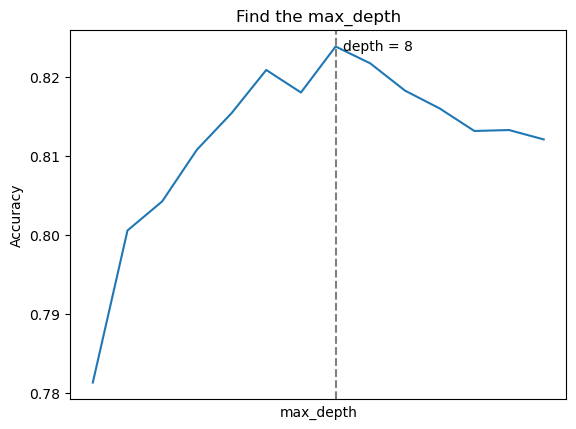

In [98]:
acc = []
dep = []
best_depth = 0
best_acc = 0

# Train a model for each depth and evaluate its accuracy
for d in range(1,15):
    model = GradientBoostingClassifier(max_depth= d , random_state=10)
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    acc.append(accuracy)
    dep.append(dep)

    if accuracy > best_acc:
      best_acc = accuracy
      best_depth = d


import matplotlib.pyplot as plt
import seaborn as sns

# Create the line plot
sns.lineplot(x=range(1, 15), y=acc)

# Remove x-ticks
plt.xticks([])

# Add x-axis label
plt.title("Find the max_depth")
plt.xlabel('max_depth')
plt.ylabel('Accuracy')


# Annotate the line at x = 8
highest_acc = acc[best_depth - 1]  # Adjusting for zero-based indexing
plt.axvline(x=best_depth , color='gray', linestyle='--')
plt.text(best_depth   + 0.2, highest_acc -1 , f"depth = {best_depth}", verticalalignment='center')

# Show the plot
plt.show()

# Q4. Scaling in Boosting

In [9]:
df = pd.read_csv("./../data/booking.csv")
df.head()

X = df.loc[:, df.columns!= 'booking_status']
y = df.loc[:, 'booking_status']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [36]:
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

In [37]:
gbc1 = GradientBoostingClassifier(random_state=10)
gbc1.fit(X_train_scaled, y_train)
y_pred = gbc1.predict(X_test_scaled)
accuracy_score(y_pred, y_test)

0.8042755344418052

In [39]:
gbc2 = GradientBoostingClassifier(random_state=10)
gbc2.fit(X_train, y_train)
y_pred = gbc2.predict(X_test)
accuracy_score(y_pred, y_test)

0.8042755344418052

In [29]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are already defined
scaler = StandardScaler()

# Fit on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

model_with_scaled = GradientBoostingClassifier(random_state=10)
model_with_scaled.fit(X_train_scaled, y_train)
accuracy_with_scaled = accuracy_score(y_test, model_with_scaled.predict(X_test_scaled))

model_without_scaled = GradientBoostingClassifier(random_state=10)
model_without_scaled.fit(X_train, y_train)
accuracy_without_scaled = accuracy_score(y_test, model_without_scaled.predict(X_test))

print(f"accuracy_with_scaled = {accuracy_with_scaled}")
print(f"accuracy_without_scaled = {accuracy_without_scaled}")

print(f"Difference = {accuracy_with_scaled - accuracy_without_scaled}")


accuracy_with_scaled = 0.8042755344418052
accuracy_without_scaled = 0.8042755344418052
Difference = 0.0


# Q5. Grid Search Boosting

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
gbc = GradientBoostingClassifier(random_state=10)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 8],
    'min_samples_split': [2, 4, 6]
}
kfold = KFold(n_splits=2, random_state=10, shuffle=True)
gscv = GridSearchCV(gbc, param_grid=param_grid, verbose=6, cv=kfold,  return_train_score=True , scoring='accuracy', n_jobs=-1)
cv_results = gscv.fit(X_train, y_train)

TypeError: GridSearchCV.__init__() got an unexpected keyword argument 'random_state'

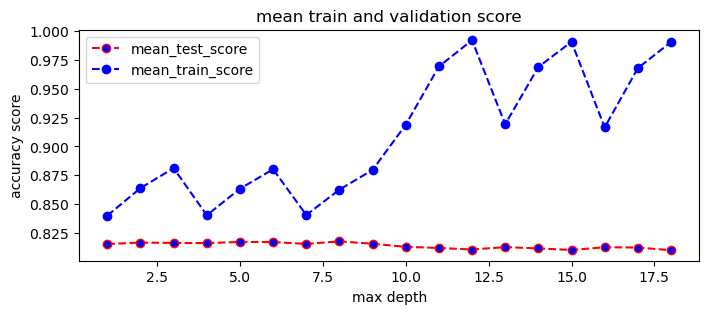

In [45]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 19), cv_results.cv_results_['mean_test_score'], color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', label= 'mean_test_score')
plt.plot(range(1, 19), cv_results.cv_results_['mean_train_score'], color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', label= 'mean_train_score')

plt.legend()
plt.title('mean train and validation score')
plt.xlabel('max depth')
plt.ylabel('accuracy score')
plt.show()

In [52]:
cv_results.best_estimator_

GradientBoostingClassifier(max_depth=5, min_samples_split=6, n_estimators=200,
                           random_state=10)

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np

# Defining the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 8],
    'min_samples_split': [2, 4, 6]
}

# Initializing the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=10)

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(gbm, param_grid, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Printing the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

result = grid_search.cv_results_
for i in range(len(result["params"])):
  print(f"Parameters:{result['params'][i]} Mean_score: {result['mean_test_score'][i]} Rank: {result['rank_test_score'][i]}")

print(grid_search.best_estimator_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: 0.8193290109227566
Parameters:{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100} Mean_score: 0.8155285429094269 Rank: 14
Parameters:{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200} Mean_score: 0.8184976499492972 Rank: 6
Parameters:{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300} Mean_score: 0.8193290109227566 Rank: 1
Parameters:{'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 100} Mean_score: 0.8153800648123027 Rank: 15
Parameters:{'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 200} Mean_score: 0.8186460777955512 Rank: 5
Parameters:{'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 300} Mean_score: 0.8188242197747085 Rank: 3
Parameters:{'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 100} Mean_score: 0.815914503973688 Rank: 12
Parameters:{'max_depth': 5